#### PyTorch:
- package for deep learning
- many built-in neural networks components
- automatic differentiation
- uses the GPU for faster computation
- made by Facebook
- documentation at https://pytorch.org/docs/stable/index.html

#### GPU (Graphics Processing Unit)
- a chip that has many simple processors (cores)
- nowadays 3000-10000+ cores on a single chip
- video card with specialized GPU memory for fast communication
- can do embarasingly parallel computation
- matrix operations, image processing, etc
- CUDA is a GPU language developed by Nvidia
- we want Nvidia GPUs, e.g. on GeForce video cards (e.g. 3060 that has ~3000 cores and 16Gb memory)

#### Installing PyTorch
- follow the instructions at https://pytorch.org/
- specific commands for different operating systems, Python environments and GPU CUDA versions

#### Using the GPU
- if you have a GPU and have installed PyTorch with CUDA, this should work
- if it works, then 'device' is the GPU

In [19]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


#### PyTorch Tensors
- similar to NumPy arrays
- similar operations and broadcasting
- have some extra capabilities
- can exist either on the CPU or on the GPU

Available data types:
- torch.bool
- torch.uint8
- torch.int8, torch.int16, torch.int32, torch.int64
- torch.half, torch.float, torch.double, torch.bfloat

In [ ]:
x=torch.tensor([[1,2],[3,4]], device=device).float()
print(x)

In [ ]:
# Tensor examples
x=torch.zeros((2,7), device=device) # vector made directly on the GPU
print(x)
x=torch.ones((2,7), dtype=torch.half).to(device) # vector made on the CPU, then copied to the GPU
print(x)
x1=torch.ones((2,7)).double()  # can convert to different data types for the desired precision
print(x1)
print(x1.to(device))
print(x1.long())
print(x.device,x1.device)
print(x.to('cpu')+x1)

In [ ]:
x=torch.randn(2,3,2)
print(x.shape)
y=x.permute(1,2,0)  # permuting dimensions
print(y.shape)
z=x.unsqueeze(1)    # adding an extra dimension
print(z.shape)


In [ ]:
# Some important operations
x=torch.randn(2,3,2)
print(x.shape)
y=x.permute(1,2,0)  # permuting dimensions
print(y.shape)
z=x.unsqueeze(1)    # adding an extra dimension
print(z.shape)
x=torch.randn(2,4)
print(x)
#w=x.clone()         # make a copy
w=x
w[0,0]=1
print(w)
print(torch.eq(x, w)) # check whether they are identical
nx=x.numpy()        # convert to NumPy array
xx=torch.from_numpy(nx) # convert from NumPy array
print(nx)
print(xx)

#### Linear Algebra
- most linear algebra functions are implemented
- det, logdet, inv, pinv, solve
- svd, eig
- cholesky, qr, lu

In [ ]:
# Linear algebra examples
A=torch.rand(5,5)
Ai=torch.linalg.inv(A)
print(Ai)
u,d,vt=torch.linalg.svd(A)
print(d)
B=torch.rand(5,1)
x=torch.linalg.solve(A,B)
print(x)
print(torch.det(A), torch.logdet(A))

#### Batching
- many matrix operations can be done in batches
- the first dimensions are assumed to be indices, and last two are actual matrices
- takes advantage of the GPU
- current GPUs have 3000-10000 cores, can do many multiplications simultaneously

In [ ]:
# Batching examples
A=torch.rand(100,5,5).double()  # 100 matrices of size 5x5
print(A.shape)
Ai=torch.linalg.inv(A) # the inverse of 100 matrices of size 5x5
print(torch.det(A))
B=torch.rand(100,5,1).double()  # 100 vectors of size 5x1
x=torch.linalg.solve(A,B)
print(x.shape)
Dif=A@x-B              # Check the difference between Ax and B
l2dif=torch.sum(Dif**2,1).squeeze()
print(l2dif)  # Compute the L2 square norms of the vectors
print(torch.max(l2dif))

In [ ]:
#### Random Number Generation
- most NumPy Functions are implemented.
- can use a seed to generaye exactly the same psudo-random sequence

In [ ]:
torch.manual_seed(0)

In [ ]:
a=torch.randn(5,5)
print(a)

In [ ]:
#### Distributions
- can generate samples from various distribution families
- Bernoulli, binomial, multinomial, Exponential, LogNormal
- Multi-variate Gaussian, Beta, Gamma, Cauchy, Chi^2, Dirichlet
- Pareto, Poisson, StudentT, VonMises, Weibull, Wishart

time=0.11
time=1.27


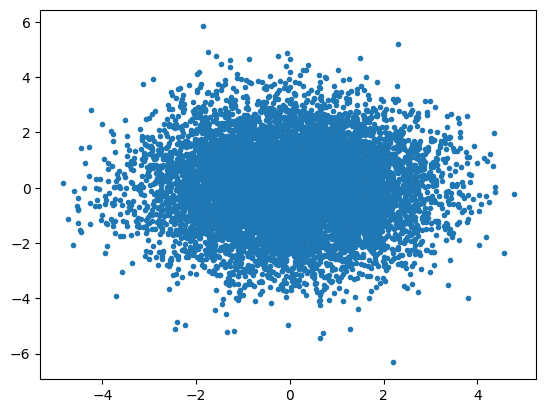

In [21]:
# MultivariateNormal example
import matplotlib.pyplot as plt
from time import time
t0=time()
p=10000
if 1:
    mu=torch.zeros(p,device=device)
    x=torch.randn((p,p),device=device)
    d=torch.diag(1+torch.randn(p,device=device)**2)
else:
    mu=torch.zeros(p)
    x=torch.randn((p,p))
    d=torch.diag(1+torch.randn(p)**2)
q,r=torch.linalg.qr(x)
sigma=q.t()@d@q
t1=time()
print('time=%1.2f'%(t1-t0))
#print(torch.logdet(sigma))
mvn=torch.distributions.MultivariateNormal(mu, sigma)
x=mvn.sample([10000])
print('time=%1.2f'%(time()-t1))
plt.plot(x[:,0].cpu(),x[:,1].cpu(),'.')
plt.show()

In [ ]:
mn=torch.distributions.multinomial.Multinomial(1000, torch.tensor([0.1,0.2,0.7]))
x=mn.sample([10])
print(x)

#### LowRankMultivariateNormal
- a multivariate normal with Sigma=WW^T+diag(d)
- need to sepcify the low rank W and the vector d

In [ ]:
# mixture of LowRankMultivarianteNormal example
mix = torch.distributions.Categorical(torch.ones(4,))
mus=torch.tensor([[0.,0],[5,0],[5,5],[-5,-5]])
#comp = torch.distributions.MultivariateNormal(mus, torch.tensor([[1.1,-1],[-1,1.1]]))
w = torch.randn(4,2,1)
diag=torch.ones(2)*0.03
comp = torch.distributions.LowRankMultivariateNormal(mus,w,diag) # a batch of four distributions
gmm = torch.distributions.MixtureSameFamily(mix, comp)
x=gmm.sample([1000])
plt.plot(x[:,0],x[:,1],'.')
plt.show()

In [ ]:
# KL Divergence
d=torch.distributions.kl.kl_divergence(mvn,comp)
print(d)

#### Loading Images
- can be done using different packages
- must be careful that the image is not distroted in some way

In [ ]:
from os import listdir
from os.path import isfile, join
import imageio.v2 as imageio
mypath="d:/tmp/cnntest/"
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
n=len(files)
print(n)
x=torch.zeros([n,3,64,64], dtype=torch.float32)
for i in range(n):
    im = imageio.imread(join(mypath, files[i])) # 64x64x3
    x[i,:,:,:]=torch.from_numpy(im).permute(2,0,1)
    if i==2220:
        print(im)
        plt.imshow(im)

In [ ]:
mx=torch.mean(x,axis=0)
print(mx)
plt.imshow(mx.permute(1,2,0)/255)

#### Saving Data and Models
- use torch.save and torch.load
- if the tensor is on GPU, it will be loaded on GPU

In [ ]:
torch.save({'x':x,'mx':mx.to(device)},'data.pt')

In [ ]:
# Save and load example
d=torch.load('data.pt')
print(d.keys())
x1=d['x']
mx1=d['mx']
print(mx1.device)
print(x1.device)